## CASE 7: Non-Inverting Attenuation with Positive Offset

We use superposition for calculating the Vout. (Shorten Voltage Sources)


Having $V_{ref}$ shortened to $GND$ 

$$
\dfrac{V_{out1}}{V_{in}} = \dfrac{R_2 || R_3}{R_1+(R_2 || R_3)}
$$

$$
V_{out1} = V_{in}*\dfrac{R_2 || R_3}{R_1+(R_2 || R_3)}
$$

Having $V_{in}$ shortened to $GND$ 

$$
\dfrac{V_{out2}}{V_{ref}} = \dfrac{R_1 || R_2}{R_3+(R_1 || R_2)}
$$

$$
V_{out2} = V_{ref}*\dfrac{R_1 || R_2}{R_3+(R_1 || R_2)}
$$

$V_{out}$ is the sum of $V_{ou1}+V_{out2}$ the two:

$$
V_{out}=V_{out1}+V_{out2}
$$


We chose $V_{ref}$ to generate the output and $R_1$.

<div>
<img src="http://earmark.net/gesr/opamp/case7_sch.gif" width="500"/>
</div>


In [335]:
from ESeries import ESeries
#Define the E_Series to chose the Resistors from 
series_range= ESeries.Series.E24

In [336]:
%matplotlib inline
#%pip install sympy numpy pyspice dill
import dill
#dill.load_session(session_file_name)
import sympy as sp
from sympy import solve, symbols, Eq, S
from IPython.display import Math, display

# Importing packages
import matplotlib.pyplot as plt
import numpy as np

from operator import itemgetter
from IPython.display import Markdown as md

from ESeries import ESeries

sp.init_printing()
series= ESeries()


In [337]:
%store -r m
%store -r b
%store -r x1
%store -r y1
%store -r x2
%store -r y2
%store -r Vx
m=m
b=b
x1=x1
y1=y1
x2=x2
y2=y2

#chosen Vx, the voltage to generate Vref
vx_chosen=12
#chose r_1
r_1_chosen=100e3
m,b,x1,y1,x2,y2


In [338]:
r_1,r_2,r_3,v_in,v_ref,v_in, v_out1, v_out2, v_out= symbols('R_1 R_2 R_3 V_in V_ref V_in V_out1 V_out2 V_out')


$V_{out1}$

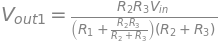

In [339]:
vout_1_eq=Eq(v_out1,v_in*(r_2*r_3/(r_2+r_3))/(r_1+(r_2*r_3/(r_2+r_3))))
vout_1_eq

$V_{out2}$

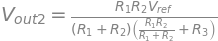

In [340]:
vout_2_eq=Eq(v_out2,v_ref*(r_1*r_2/(r_1+r_2))/(r_3+(r_1*r_2/(r_1+r_2))))
vout_2_eq

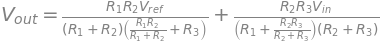

In [341]:
v_out_eq=Eq(v_out,vout_1_eq.rhs+vout_2_eq.rhs)
v_out_eq

In [342]:
#r_1_chosen, _=series.preferred_value(r_1_chosen)
r_2,r_3=solve([
v_out_eq.subs(v_ref,vx_chosen).subs(v_in,x1).subs(v_out,y1).subs(r_1,r_1_chosen),
v_out_eq.subs(v_ref,vx_chosen).subs(v_in,x2).subs(v_out,y2).subs(r_1,r_1_chosen),
],
[r_2,r_3],
)[0]
r_2,r_3

In [343]:
#find sreies resistor for calculated values_2
r_2,error_r_2=series.preferred_value(r_value=r_2,series=ESeries.Series.E24)
r_3, error_r_3=series.preferred_value(r_value=r_3,series=ESeries.Series.E24)
r_2,r_3

In [344]:
md(f"### $R_1 = {r_1_chosen:.3f}\Omega , R_2 = {r_2:.3f}\Omega , R_3= {r_3:.3f}, V_ref= {vx_chosen}V$")

### $R_1 = 100000.000\Omega , R_2 = 62000.000\Omega , R_3= 240000.000, V_ref= 12V$